In [1]:
from fastai.text import *
from fastai.datasets import *
from pathlib import Path
import pandas as pd
from fastai.metrics import *
from fastai.train import *
from fastai.vision import *
from fastai.imports import nn, torch
from sklearn import metrics
import sklearn.metrics
torch.cuda.set_device(2)

In [2]:
EX_PA = Path('/mnt/data/group07/johannes/ynacc_proc/clean_split/')
LM_DATA_PATH = Path('/mnt/data/group07/johannes/ynacc_proc/clean_split/lm_data/')

In [3]:
# df_lm = pd.read_csv(LM_DATA_PATH)

In [15]:
df_cl = pd.read_csv(str(EX_PA) + '/train.csv')
df_cl

,url,article_text,title,publish_date,text,headline,timestamp,class
0,http://ap-org-yahoopartner.tumblr.com/post/142...,"RALEIGH, N.C. (AP) — Signed only two weeks ago...",NaN,NaN,@USERNAME very well said.,"Law on discrimination, bathrooms aids campaign...",1460149947,0
1,http://ap-org-yahoopartner.tumblr.com/post/142...,"RALEIGH, N.C. (AP) — Signed only two weeks ago...",NaN,NaN,Homosexuals could be put down quite possibly a...,"Law on discrimination, bathrooms aids campaign...",1460149171,0
2,http://ap-org-yahoopartner.tumblr.com/post/142...,"RALEIGH, N.C. (AP) — Signed only two weeks ago...",NaN,NaN,"If you let someone difference of lifestyle, or...","Law on discrimination, bathrooms aids campaign...",1460149619,0
3,http://ap-org-yahoopartner.tumblr.com/post/142...,"RALEIGH, N.C. (AP) — Signed only two weeks ago...",NaN,NaN,heterosexuals think they are the only people l...,"Law on discrimination, bathrooms aids campaign...",1460150754,0
4,http://ap-org-yahoopartner.tumblr.com/post/142...,"RALEIGH, N.C. (AP) — Signed only two weeks ago...",NaN,NaN,Really? How do they publicly announce their se...,"Law on discrimination, bathrooms aids campaign...",1460149580,0
5,http://ap-org-yahoopartner.tumblr.com/post/142...,"RALEIGH, N.C. (AP) — Signed only two weeks ago...",NaN,NaN,Conservatives could be put down quite possibly...,"Law on discrimination, bathrooms aids campaign...",1460151577,0
6,http://ap-org-yahoopartner.tumblr.com/post/142...,"RALEIGH, N.C. (AP) — Signed only two weeks ago...",NaN,NaN,Brian-Ms.Ortega pretending to be a male doesn'...,"Law on discrimination, bathrooms aids campaign...",1460149372,0
7,http://ap-org-yahoopartner.tumblr.com/post/142...,"RALEIGH, N.C. (AP) — Signed only two weeks ago...",NaN,NaN,Army??? Then you must know Sgt. Shane Ortega. ...,"Law on discrimination, bathrooms aids campaign...",1460147799,0
8,http://ap-org-yahoopartner.tumblr.com/post/142...,"RALEIGH, N.C. (AP) — Signed only two weeks ago...",NaN,NaN,"Born male, use the men's restroom, locker room...","Law on discrimination, bathrooms aids campaign...",1460147600,0
9,http://ap-org-yahoopartner.tumblr.com/post/142...,"RALEIGH, N.C. (AP) — Signed only two weeks ago...",NaN,NaN,So then you have no problem if he were to stan...,"Law on discrimination, bathrooms aids campaign...",1460153181,0


In [3]:
# df_t = pd.read_csv(str(EX_PA) + '/train.csv')
# df_t = df_t[['class', 'article_text', 'text']]

# # df_t['text'] = df_t['article_text'].astype(str) + ' xxsep ' + df_t['text']
# # df_t['text'] = ' xxsep ' + df_t['text']
# # df_t['text'] = df_t['article_text'].astype(str) + ' xxsep ' + df_t['text']
# df_t = df_t[['class', 'text']]

# df_t.to_csv(str(EX_PA) + '/train_2_3.csv', header=None, index=None)

# df_train = df_t

# df_t = pd.read_csv(str(EX_PA) + '/val.csv')
# df_t = df_t[['class', 'article_text', 'text']]

# # df_t['text'] = df_t['article_text'].astype(str) + ' xxsep ' + df_t['text']
# # df_t['text'] = ' xxsep ' + df_t['text']
# df_t = df_t[['class', 'text']]

# df_t.to_csv(str(EX_PA) + '/val_2_3.csv', header=None, index=None)
# df_t

# # df_t = pd.read_csv(str(EX_PA) + '/train.csv')
# # df_t = df_t[['class', 'headline', 'text']]

# # df_t['text'] = df_t['headline'].astype(str) + ' xxsep ' + df_t['text']
# # df_t = df_t[['class', 'text']]

# # df_t.to_csv(str(EX_PA) + '/train_2.csv', header=None, index=None)

# # df_t = pd.read_csv(str(EX_PA) + '/val.csv')
# # df_t = df_t[['class', 'headline', 'text']]

# # df_t['text'] = df_t['headline'].astype(str) + ' xxsep ' + df_t['text']
# # df_t = df_t[['class', 'text']]

# # df_t.to_csv(str(EX_PA) + '/val_2.csv', header=None, index=None)
# # df_t

,class,text
0,0,"I am indifferent between $70 mil in diamonds, ..."
1,0,"Yea, you're right. It would weight a little un..."
2,0,I'd take the $70 million bucks and spend it on...
3,0,"I'm with you, H2O. You can't invest with gold ..."
4,0,"If I had the choice of a $70 million diamond, ..."
5,0,Trump already had a boatload of money and is o...
6,0,You also can't hide the FACT that very Feminis...
7,0,Drumpf is running because he want's MORE money...
8,0,"Yep, proof that the idiots outnumber the sane,..."
9,0,Do you really think Trump wants all of that ag...


In [54]:
df_train['class'].value_counts()

0    5216
1    2614
Name: class, dtype: int64

In [4]:
for t in df_t['text']: print(len(t.split()))

254
262
255
256
262
940
935
922
914
924
907
911
996
667
667
746
675
717
670
296
290
334
298
296
446
379
344
369
370
340
253
243
221
246
245
240
229
235
226
223
243
221
233
314
314
372
288
294
296
241
188
187
192
187
274
192
123
106
113
305
189
239
260
219
187
415
403
412
420
464
444
424
404
407
414
452
418
305
350
329
317
377
298
310
342
297
343
350
364
350
449
343
349
335
342
349
346
430
333
331
373
353
303
256
317
333
343
464
322
412
372
318
335
364
337
342
392
474
362
321
324
335
489
528
511
459
475
402
310
312
307
324
307
567
449
534
414
420
399
428
414
438
410
576
498
515
579
498
500
509
557
225
239
228
288
231
355
332
442
548
542
669
637
526
561
600
529
529
538
554
523
550
524
554
538
569
436
362
352
346
365
355
349
436
381
345
443
353
459
351
362
357
354
378
360
468
464
405
378
374
365
368
621
570
544
615
591
275
253
224
233
281
236
231
268
242
226
238
225
241
237
227
306
278
382
317
288
271
374
424
356
565
707
569
567
569
562
583
150
172
155
171
287
297
309
312
311
311
854
853


In [5]:
df_t['text'][300]

'By Serena Maria Daniels\n\nFLINT, Mich. (Reuters) - Three Michigan state and local officials were criminally charged on Wednesday in an investigation into dangerous lead levels in the city of Flint’s drinking water, and the state attorney general said there would be more to come.\n\nGenesee District Judge Tracy Collier-Nix authorized charges against Flint employee Michael Glasgow and Michigan Department of Environmental Quality (MDEQ) employees Stephen Busch and Michael Prysby.\n\nGlasgow, 40, was charged with tampering with evidence and willful neglect of duty, according to court documents.\n\nBusch, 40, and Prysby, 53, were each charged with six counts, including misconduct in office, tampering with evidence and violation of the Michigan Safe Drinking Water Act, according to court documents. Busch, a district manager in the drinking water division, had already been suspended.\n\nMichigan Attorney General Bill Schuette told a news conference to announce the charges that it was “only 

In [4]:
tokenizer = Tokenizer(special_cases = ['xxbos','xxfld','xxunk','xxpad', 'xxsep'])
# tokenizer = None

In [5]:
# Language model data
data_lm = TextLMDataBunch.from_csv(LM_DATA_PATH, valid='val', tokenizer=tokenizer)

# Classifier model data
data_clas = TextClasDataBunch.from_csv(EX_PA, vocab=data_lm.train_ds.vocab, bs=33, train="train", valid='val', txt_cols=['text'], label_cols=['class'])

In [8]:
data_lm.train_ds.vocab.stoi['xxsep']

0

In [7]:
data_clas.train_dl.dl.one_batch()

[tensor([[   9,    1,    1,  ...,    1,    1,    1],
         [   8,    1,    1,  ...,    1,    1,    1],
         [  65,    1,    1,  ...,    1,    1,    1],
         ...,
         [   3,  594,  160,  ...,    2,    5,  132],
         [ 347,    0,  907,  ..., 1125, 2751, 1110],
         [ 200,    2,    2,  ...,    2,    2,   24]], device='cuda:0'),
 tensor([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         1, 0, 1, 0, 0, 0, 0, 0], device='cuda:0')]

In [10]:
# for t in data_lm.train_dl.dl.one_batch()[0]:
#     print(data_lm.train_ds.vocab.textify(t.tolist()))
#     print()

In [11]:
data_clas.train_dl.dl.one_batch()

[tensor([[  80,    1,    1,  ...,    1,    1,    1],
         [  72,    1,    1,  ...,    1,    1,    1],
         [  48,    1,    1,  ...,    1,    1,    1],
         ...,
         [   3,    0,    2,  ...,   82,   84,    4],
         [ 308,  735,  151,  ...,   50, 3553,  163],
         [ 232,    4, 5591,  ...,    4,    4,   68]], device='cuda:0'),
 tensor([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
         1, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')]

In [8]:
for t in data_clas.train_dl.dl.one_batch()[0].transpose(dim0=0, dim1=1):
    print(data_lm.train_ds.vocab.textify(t.tolist()).split('xxsep'))
#     print(len(t.tolist()))
    print()

['xxfld 1 by now , you xxunk surely heard the soul - xxunk if not entirely surprising news that american idol has been xxunk . season 15 , xxunk this week , will be the long - running ( and some might say long - suffering ) xxunk last . xxunk to be honest , idol haters have been expecting this news for years now — since xxunk xxunk and xxunk xxunk left the show during season 9 ; or when the xxunk - but - xxunk xxunk hicks won season 5 ; or maybe even after xxunk xxunk , who xxunk xxup xxunk years ago , became the last winner to rack up xxunk album sales . xxunk but i never gave up on this show . and i am so glad i did n’t , because over the past 15 seasons , many xxunk , even ones who did n’t exactly set the xxunk on fire post - idol , have delivered some truly fantastic xxunk . and i got to witness — and write about — all of them . xxunk while nearly a decade and a half of idol has xxunk countless xxunk xxunk xxunk that had xxunk xxunk making cat - in - a - xxunk xxunk and randy jacks

In [13]:
download_wt103_model()

In [6]:
learn = RNNLearner.language_model(data_lm, pretrained_fnames=['lstm_wt103', 'itos_wt103'], drop_mult=0.5)
learn.fit_one_cycle(10, 1e-2)

Total time: 1:10:12
epoch  train loss  valid loss  accuracy
0      4.716767    4.515244    0.241011  (06:58)
1      4.641014    4.489194    0.241783  (07:00)
2      4.651801    4.519025    0.239560  (06:59)
3      4.665293    4.519995    0.239813  (07:01)
4      4.624304    4.508092    0.240934  (07:01)
5      4.584347    4.486806    0.242690  (07:01)
6      4.554198    4.462272    0.244384  (07:01)
7      4.506977    4.444219    0.245889  (07:01)
8      4.529426    4.433296    0.246511  (07:02)
9      4.472345    4.430840    0.246589  (07:02)



In [1]:
learn = RNNLearner.language_model(data_lm, pretrained_fnames=['lstm_wt103', 'itos_wt103'], drop_mult=0.2)
learn.fit_one_cycle(3, 1e-2)

NameError: name 'RNNLearner' is not defined

In [10]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

Total time: 00:10
epoch  train loss  valid loss  accuracy
0      4.358080    4.331319    0.237584  (00:10)



In [11]:
learn.save_encoder(EX_PA/'ft_enc')

In [12]:
weights = [0.5, 1]
class_weights = torch.FloatTensor(weights).cuda()
loss_func = nn.CrossEntropyLoss(weight=class_weights)

In [19]:
def f1(preds, y_true):
    _, y_pred = preds.max(dim=1)
    cpu_res = sklearn.metrics.f1_score(y_true.cpu().numpy(), y_pred.cpu().numpy(), average='macro')
    return torch.tensor(cpu_res)

In [27]:
learn = RNNLearner.classifier(data_clas, drop_mult=0.1, loss_fn=loss_func)
learn.load_encoder(EX_PA/'ft_enc')
learn.loss_fn = loss_func
learn.metrics = [accuracy, f1]
# learn.fit_one_cycle(1, 1e-3)

In [ ]:
while True:
    learn = RNNLearner.classifier(data_clas, drop_mult=0.1, loss_fn=loss_func)
    learn.load_encoder(EX_PA/'ft_enc')
    learn.loss_fn = loss_func
    learn.metrics = [accuracy, f1]
    learn.fit_one_cycle(1, 1e-2)

Total time: 03:28
epoch  train loss  valid loss  accuracy  f1      
0      0.678318    0.678902    0.656846  0.535608  (03:28)



Total time: 03:56
epoch  train loss  valid loss  accuracy  f1      
0      0.674008    0.660172    0.651646  0.572317  (03:56)



Total time: 03:54
epoch  train loss  valid loss  accuracy  f1      
0      0.674330    0.666086    0.655113  0.564238  (03:54)



Total time: 03:21
epoch  train loss  valid loss  accuracy  f1      
0      0.681259    0.688127    0.606586  0.532237  (03:21)



Total time: 03:16
epoch  train loss  valid loss  accuracy  f1      
0      0.670334    0.675289    0.642981  0.541281  (03:16)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Total time: 03:45
epoch  train loss  valid loss  accuracy  f1      
0      0.679413    0.674134    0.667244  0.511950  (03:45)



Total time: 03:42
epoch  train loss  valid loss  accuracy  f1      
0      0.671176    0.669672    0.675910  0.545363  (03:42)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Total time: 03:56
epoch  train loss  valid loss  accuracy  f1      
0      0.682319    0.677401    0.667244  0.477432  (03:56)



Total time: 03:53
epoch  train loss  valid loss  accuracy  f1      
0      0.676952    0.665919    0.686309  0.528365  (03:53)



Total time: 03:56
epoch  train loss  valid loss  accuracy  f1      
0      0.687840    0.666827    0.658579  0.511078  (03:56)



Total time: 03:55
epoch  train loss  valid loss  accuracy  f1      
0      0.682162    0.667643    0.634315  0.582659  (03:55)



Total time: 03:15
epoch  train loss  valid loss  accuracy  f1      
0      0.675045    0.684621    0.611785  0.530113  (03:15)



Total time: 03:39
epoch  train loss  valid loss  accuracy  f1      
0      0.681808    0.669117    0.656846  0.535456  (03:39)



Total time: 03:28
epoch  train loss  valid loss  accuracy  f1      
0      0.677496    0.674745    0.656846  0.518329  (03:28)



Total time: 03:50
epoch  train loss  valid loss  accuracy  f1      
0      0.676297    0.672398    0.662045  0.532462  (03:50)



Total time: 03:55
epoch  train loss  valid loss  accuracy  f1      
0      0.676534    0.661342    0.668977  0.577254  (03:55)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Total time: 03:32
epoch  train loss  valid loss  accuracy  f1      
0      0.670470    0.673623    0.648180  0.511177  (03:32)



Total time: 03:17
epoch  train loss  valid loss  accuracy  f1      
0      0.670215    0.673370    0.623917  0.539816  (03:17)



Total time: 03:36
epoch  train loss  valid loss  accuracy  f1      
0      0.668773    0.695967    0.582322  0.478790  (03:36)



Total time: 03:54
epoch  train loss  valid loss  accuracy  f1      
0      0.684793    0.685878    0.620451  0.536146  (03:54)



Total time: 03:21
epoch  train loss  valid loss  accuracy  f1      
0      0.666621    0.681053    0.611785  0.489800  (03:21)



Total time: 03:33
epoch  train loss  valid loss  accuracy  f1      
0      0.665676    0.679182    0.623917  0.553935  (03:33)



Total time: 03:29
epoch  train loss  valid loss  accuracy  f1      
0      0.675035    0.666717    0.688042  0.544144  (03:29)



Total time: 03:43
epoch  train loss  valid loss  accuracy  f1      
0      0.683411    0.672255    0.651646  0.520944  (03:43)



Total time: 03:36
epoch  train loss  valid loss  accuracy  f1      
0      0.681406    0.670512    0.663778  0.540885  (03:36)



Total time: 03:54
epoch  train loss  valid loss  accuracy  f1      
0      0.679772    0.680095    0.620451  0.536374  (03:54)



Total time: 03:54
epoch  train loss  valid loss  accuracy  f1      
0      0.673488    0.681557    0.623917  0.534319  (03:54)



Total time: 03:49
epoch  train loss  valid loss  accuracy  f1      
0      0.685878    0.669343    0.655113  0.544572  (03:49)



Total time: 03:57
epoch  train loss  valid loss  accuracy  f1      
0      0.677157    0.673300    0.667244  0.521390  (03:57)



Total time: 03:18
epoch  train loss  valid loss  accuracy  f1      
0      0.668541    0.683021    0.646447  0.543589  (03:18)



Total time: 03:44
epoch  train loss  valid loss  accuracy  f1      
0      0.658864    0.681427    0.646447  0.497744  (03:44)



Total time: 03:40
epoch  train loss  valid loss  accuracy  f1      
0      0.677163    0.673306    0.668977  0.498679  (03:40)



Total time: 03:43
epoch  train loss  valid loss  accuracy  f1      
0      0.677787    0.679010    0.611785  0.515644  (03:43)



Total time: 03:21
epoch  train loss  valid loss  accuracy  f1      
0      0.673983    0.684044    0.535529  0.501045  (03:21)



Total time: 04:00
epoch  train loss  valid loss  accuracy  f1      
0      0.668926    0.668121    0.625650  0.525629  (04:00)



Total time: 03:19
epoch  train loss  valid loss  accuracy  f1      
0      0.676502    0.689867    0.610052  0.459101  (03:19)



Total time: 03:17
epoch  train loss  valid loss  accuracy  f1      
0      0.671507    0.680186    0.660312  0.503575  (03:17)



Total time: 03:23
epoch  train loss  valid loss  accuracy  f1      
0      0.674980    0.670210    0.665511  0.491717  (03:23)



Total time: 03:53
epoch  train loss  valid loss  accuracy  f1      
0      0.678779    0.669185    0.611785  0.534278  (03:53)



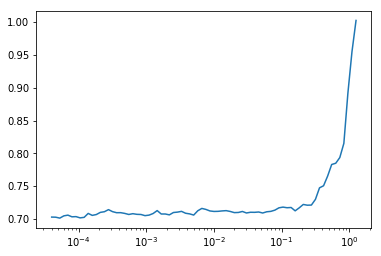

In [28]:
learn.lr_find()
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(1, 1e-3)

NameError: name 'sklearn' is not defined

In [47]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-4/2., 5e-3))

KeyboardInterrupt: 

In [44]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

Total time: 02:35
epoch  train loss  valid loss  accuracy
0      0.641516    0.704301    0.622184  (02:35)



In [60]:
# def most_uncertain(dist, num, fil=None, certain=False):
#     tmp = [(index, max(val), val.tolist().index(max(val))) for index, val in enumerate(dist)]
#     if not fil is None:
#         tmp = [t for t in tmp if t[-1] == fil]
#     sor = sorted(tmp, key=lambda x: x[1], reverse=certain)
#     return sor[:num]


# Most Certain for each party
# for index, class_name in enumerate(cls):
#     print(most_uncertain(x_distribution, 10, certain=True, fil=index))

preds, y = learn.get_preds()

preds

y

preds[0]

pred_softmax = nn.functional.softmax(preds, dim=1)

_, y_pred = preds.max(dim=1)

y_pred

cls = y

metrics.classification_report(y, y_pred, output_dict=True)

{'0': {'precision': 0.7208480565371025,
  'recall': 0.983132530120482,
  'f1-score': 0.8318042813455658,
  'support': 415},
 '1': {'precision': 0.36363636363636365,
  'recall': 0.024691358024691357,
  'f1-score': 0.04624277456647398,
  'support': 162},
 'micro avg': {'precision': 0.7140381282495667,
  'recall': 0.7140381282495667,
  'f1-score': 0.7140381282495667,
  'support': 577},
 'macro avg': {'precision': 0.542242210086733,
  'recall': 0.5039119440725867,
  'f1-score': 0.4390235279560199,
  'support': 577},
 'weighted avg': {'precision': 0.6205563853933942,
  'recall': 0.7140381282495667,
  'f1-score': 0.6112480177438104,
  'support': 577}}